In [2]:
import os
try:
	os.chdir(os.path.join(os.getcwd(), '2_analise'))
except:
	pass

 # Análise de Dados
 ## Projetos do Kickstarter
 ### Noel Viscome Eliezer

 Dataset: https://www.kaggle.com/kemical/kickstarter-projects


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [4]:
kickst = pd.read_csv('ks-projects-201801.csv', parse_dates=['deadline', 'launched'])
kickst = kickst[(kickst.pledged > 0) & (kickst.backers > 0)]
kickst['pledged_ratio'] = kickst['pledged'] / kickst['goal']

 Utilizaremos a escala logarítmica para analisar os dados de maneira mais compreensiva, visto que temos projetos desde a casa das dezenas até milhares de dólares.

In [5]:
kickst['log_pledged_ratio'] = np.log10(kickst['pledged_ratio'])
kickst['log_usd_pledged_real'] = np.log10(kickst['usd_pledged_real'])
kickst['log_usd_goal_real'] = np.log10(kickst['usd_goal_real'])
kickst['log_backers'] = np.log10(kickst['backers'])
kickst = kickst.sample(10000)

In [6]:
kickst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 154863 to 286075
Data columns (total 20 columns):
ID                      10000 non-null int64
name                    10000 non-null object
category                10000 non-null object
main_category           10000 non-null object
currency                10000 non-null object
deadline                10000 non-null datetime64[ns]
goal                    10000 non-null float64
launched                10000 non-null datetime64[ns]
pledged                 10000 non-null float64
state                   10000 non-null object
backers                 10000 non-null int64
country                 10000 non-null object
usd pledged             10000 non-null float64
usd_pledged_real        10000 non-null float64
usd_goal_real           10000 non-null float64
pledged_ratio           10000 non-null float64
log_pledged_ratio       10000 non-null float64
log_usd_pledged_real    10000 non-null float64
log_usd_goal_real       10000 non-n

In [7]:
kickst.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,pledged_ratio,log_pledged_ratio,log_usd_pledged_real,log_usd_goal_real,log_backers
count,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.081477e+09,2.669721e+04,1.087078e+04,120.846000,7.986721e+03,1.028878e+04,2.566127e+04,2.543876e+00,-0.837685,2.901913,3.739597,1.274318
std,6.186842e+08,2.445084e+05,7.872974e+04,927.161654,6.811544e+04,7.708917e+04,2.449916e+05,7.124206e+01,1.203084,1.131719,0.715751,0.805459
min,8.486250e+05,1.000000e+00,1.000000e+00,1.000000,0.000000e+00,5.300000e-01,7.400000e-01,5.000000e-08,-7.301030,-0.275724,-0.130768,0.000000
25%,5.552477e+08,2.000000e+03,1.500000e+02,4.000000,9.300000e+01,1.500000e+02,2.000000e+03,2.655278e-02,-1.575890,2.176091,3.301030,0.602060
50%,1.073257e+09,5.264000e+03,1.121000e+03,20.000000,7.164500e+02,1.122000e+03,5.500000e+03,3.006081e-01,-0.521999,3.049993,3.740363,1.301030
75%,1.622714e+09,1.600000e+04,5.177500e+03,69.000000,3.827178e+03,5.144168e+03,1.536950e+04,1.114907e+00,0.047239,3.711315,4.186660,1.838849
max,2.147370e+09,2.000000e+07,3.986929e+06,73986.000000,3.986929e+06,3.986929e+06,2.000000e+07,6.435000e+03,3.808549,6.600639,7.301030,4.869150


In [8]:
kickst.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,pledged_ratio,log_pledged_ratio,log_usd_pledged_real,log_usd_goal_real,log_backers
154863,1787384108,Got Heart Athletic T-Shirt,Graphic Design,Design,USD,2012-09-29,2000.0,2012-08-15 02:01:03,260.0,failed,9,US,260.00,260.0,2000.00,0.130000,-0.886057,2.414973,3.301030,0.954243
354181,874479075,Deemable Tech App,Radio & Podcasts,Publishing,USD,2013-03-26,1000.0,2013-02-25 22:06:23,1031.0,successful,28,US,1031.00,1031.0,1000.00,1.031000,0.013259,3.013259,3.000000,1.447158
61195,1311319642,Give the Hour - because doing a little means a...,Web,Technology,GBP,2015-05-01,5000.0,2015-03-20 08:16:15,1625.0,failed,18,GB,2425.20,2504.7,7706.77,0.325000,-0.488117,3.398756,3.886872,1.255273
112160,1569781551,Hot Rhythm Holiday 2014,Jazz,Music,USD,2013-12-31,6000.0,2013-12-01 17:30:23,6985.0,successful,41,US,6985.00,6985.0,6000.00,1.164167,0.066015,3.844166,3.778151,1.612784
236855,273970108,Gankfu - Bringing Gamers together,Video Games,Games,EUR,2017-01-07,15000.0,2016-12-29 15:13:40,112.0,failed,4,FR,117.28,119.4,15991.47,0.007467,-2.126873,2.077004,4.203888,0.602060


 A primeira feature categórica que é interessante de ser analisada é a divisão por categorias. Primeiro vamos observar a quantidade de projetos por categoria principal:

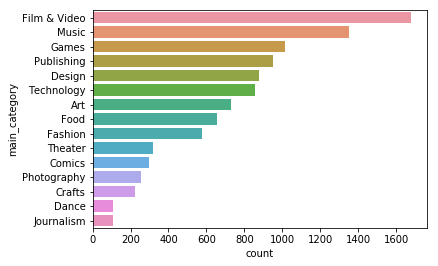

In [9]:
sns.countplot(y = 'main_category', order = kickst['main_category'].value_counts().index, data = kickst)

 O gráfico abaixo, por outro lado, estima o valor médio de cada projeto por categoria (em escala logarítmica), e percebemos que é majoritariamente uniforme.

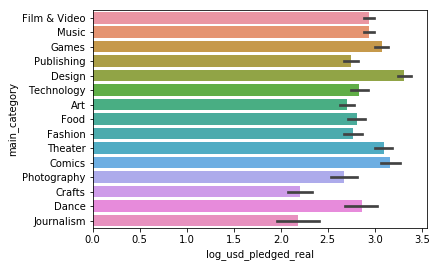

In [10]:
sns.barplot(x = 'log_usd_pledged_real', y = 'main_category', data = kickst, order = kickst['main_category'].value_counts().index)

 Já no gráfico abaixo comparamos a quantidade de projetos bem sucedidos e cancelados ou que falharam. Há também projetos em andamento, suspensos ou sem categoria, mas não foram inclusos devido à pouca representatividade.

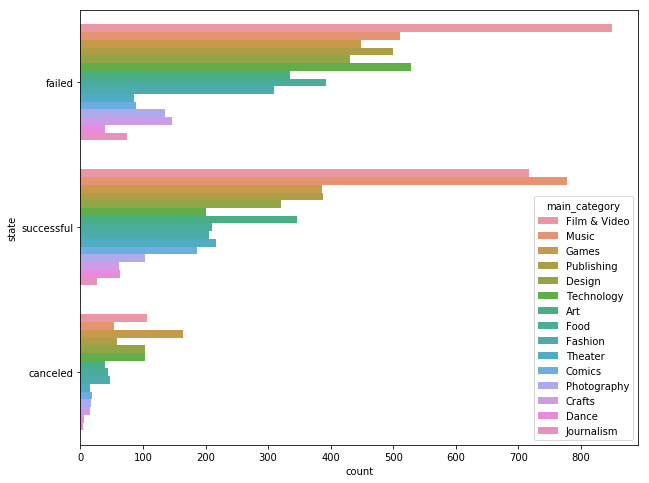

In [11]:
plt.figure(figsize= (10, 8))
sns.countplot(y = 'state', hue = kickst['main_category'], hue_order = kickst['main_category'].value_counts().index, data = kickst[(kickst.state == 'successful') | (kickst.state == 'failed') | (kickst.state == 'canceled')])
plt.show()


 Os gráficos abaixo mostram a média de arrecadação em relação à meta para cada categoria quando todos os projetos são inclusos, e apenas quando incluímos os projetos bem-sucedidos.

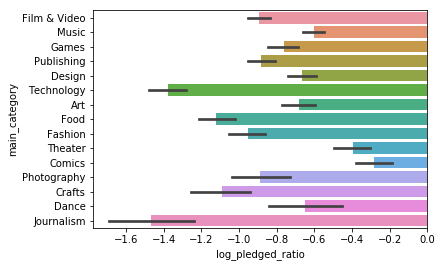

In [12]:
sns.barplot(x = 'log_pledged_ratio', y = 'main_category', data = kickst, order = kickst['main_category'].value_counts().index)

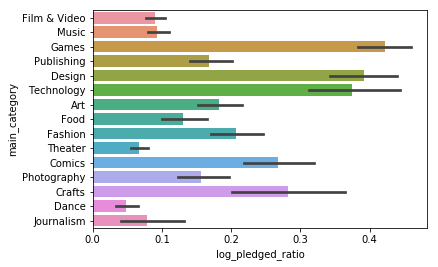

In [13]:
sns.barplot(x = 'log_pledged_ratio', y = 'main_category', data = kickst[kickst.state == "successful"], order = kickst['main_category'].value_counts().index)